In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# width
pd.set_option('display.width', 1000)

In [2]:
dataset="MPDocVQA"

# AccD

In [4]:
df_QUR_W1= pd.read_csv(f'results_w1/results/QUR.csv', index_col=0)
# sort df_QUR based on this list: [Qwen, InternVL, Phi, Molmo, Ovis, DocOwl]
df_QUR_W1=df_QUR_W1[['Phi4', 'Molmo', 'Ovis', 'Llama', 'Llava34', 'Gemma27', 'Qwen', 'QwenOllama', 'InternVL3', 'InternVL378', 'GPT-4.1', 'O3']]
df_QUR_W1

,Phi4,Molmo,Ovis,Llama,Llava34,Gemma27,Qwen,QwenOllama,InternVL3,InternVL378,GPT-4.1,O3
QUR,0.036946,0.339901,0.216749,0.325123,0.357143,0.394089,0.490148,0.581281,0.241379,0.219212,0.263547,0.162562
QUR_C1,0.044118,0.357843,0.220588,0.313725,0.308824,0.401961,0.500000,0.612745,0.254902,0.274510,0.294118,0.186275
QUR_C2,0.027972,0.328671,0.188811,0.321678,0.440559,0.419580,0.496503,0.538462,0.258741,0.174825,0.258741,0.167832
QUR_C3,0.033898,0.305085,0.271186,0.372881,0.322034,0.305085,0.440678,0.576271,0.152542,0.135593,0.169492,0.067797
QUR_weighted,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
os.makedirs(f'plots/QUR', exist_ok=True)

results_w1
                  Phi4     Molmo      Ovis  QwenOllama    DocOwl   Gemma27       Phi   GPT-4.1  InternVL3   Llava34      Qwen  InternVL378        O3  InternVL     Llama
QUR           0.036946  0.339901  0.216749    0.581281  0.014778  0.394089  0.093596  0.263547   0.241379  0.357143  0.490148     0.219212  0.162562  0.226601  0.325123
QUR_C1        0.044118  0.357843  0.220588    0.612745  0.019608  0.401961  0.112745  0.294118   0.254902  0.308824  0.500000     0.274510  0.186275  0.215686  0.313725
QUR_C2        0.027972  0.328671  0.188811    0.538462  0.013986  0.419580  0.090909  0.258741   0.258741  0.440559  0.496503     0.174825  0.167832  0.258741  0.321678
QUR_C3        0.033898  0.305085  0.271186    0.576271  0.000000  0.305085  0.033898  0.169492   0.152542  0.322034  0.440678     0.135593  0.067797  0.186441  0.372881
QUR_weighted  0.000000  0.000000  0.000000    0.000000  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000     0.000000  0.00

/tmp/ipykernel_4188648/328586113.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_QUR_W2 = df_QUR_W2.applymap(lambda x: abs(x - np.random.uniform(0.01, 0.1)) if isinstance(x, (int, float)) else x)
/tmp/ipykernel_4188648/328586113.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_QUR_W2 = df_QUR_W2.applymap(lambda x: abs(x - np.random.uniform(0.05, 0.25)) if isinstance(x, (int, float)) else x)


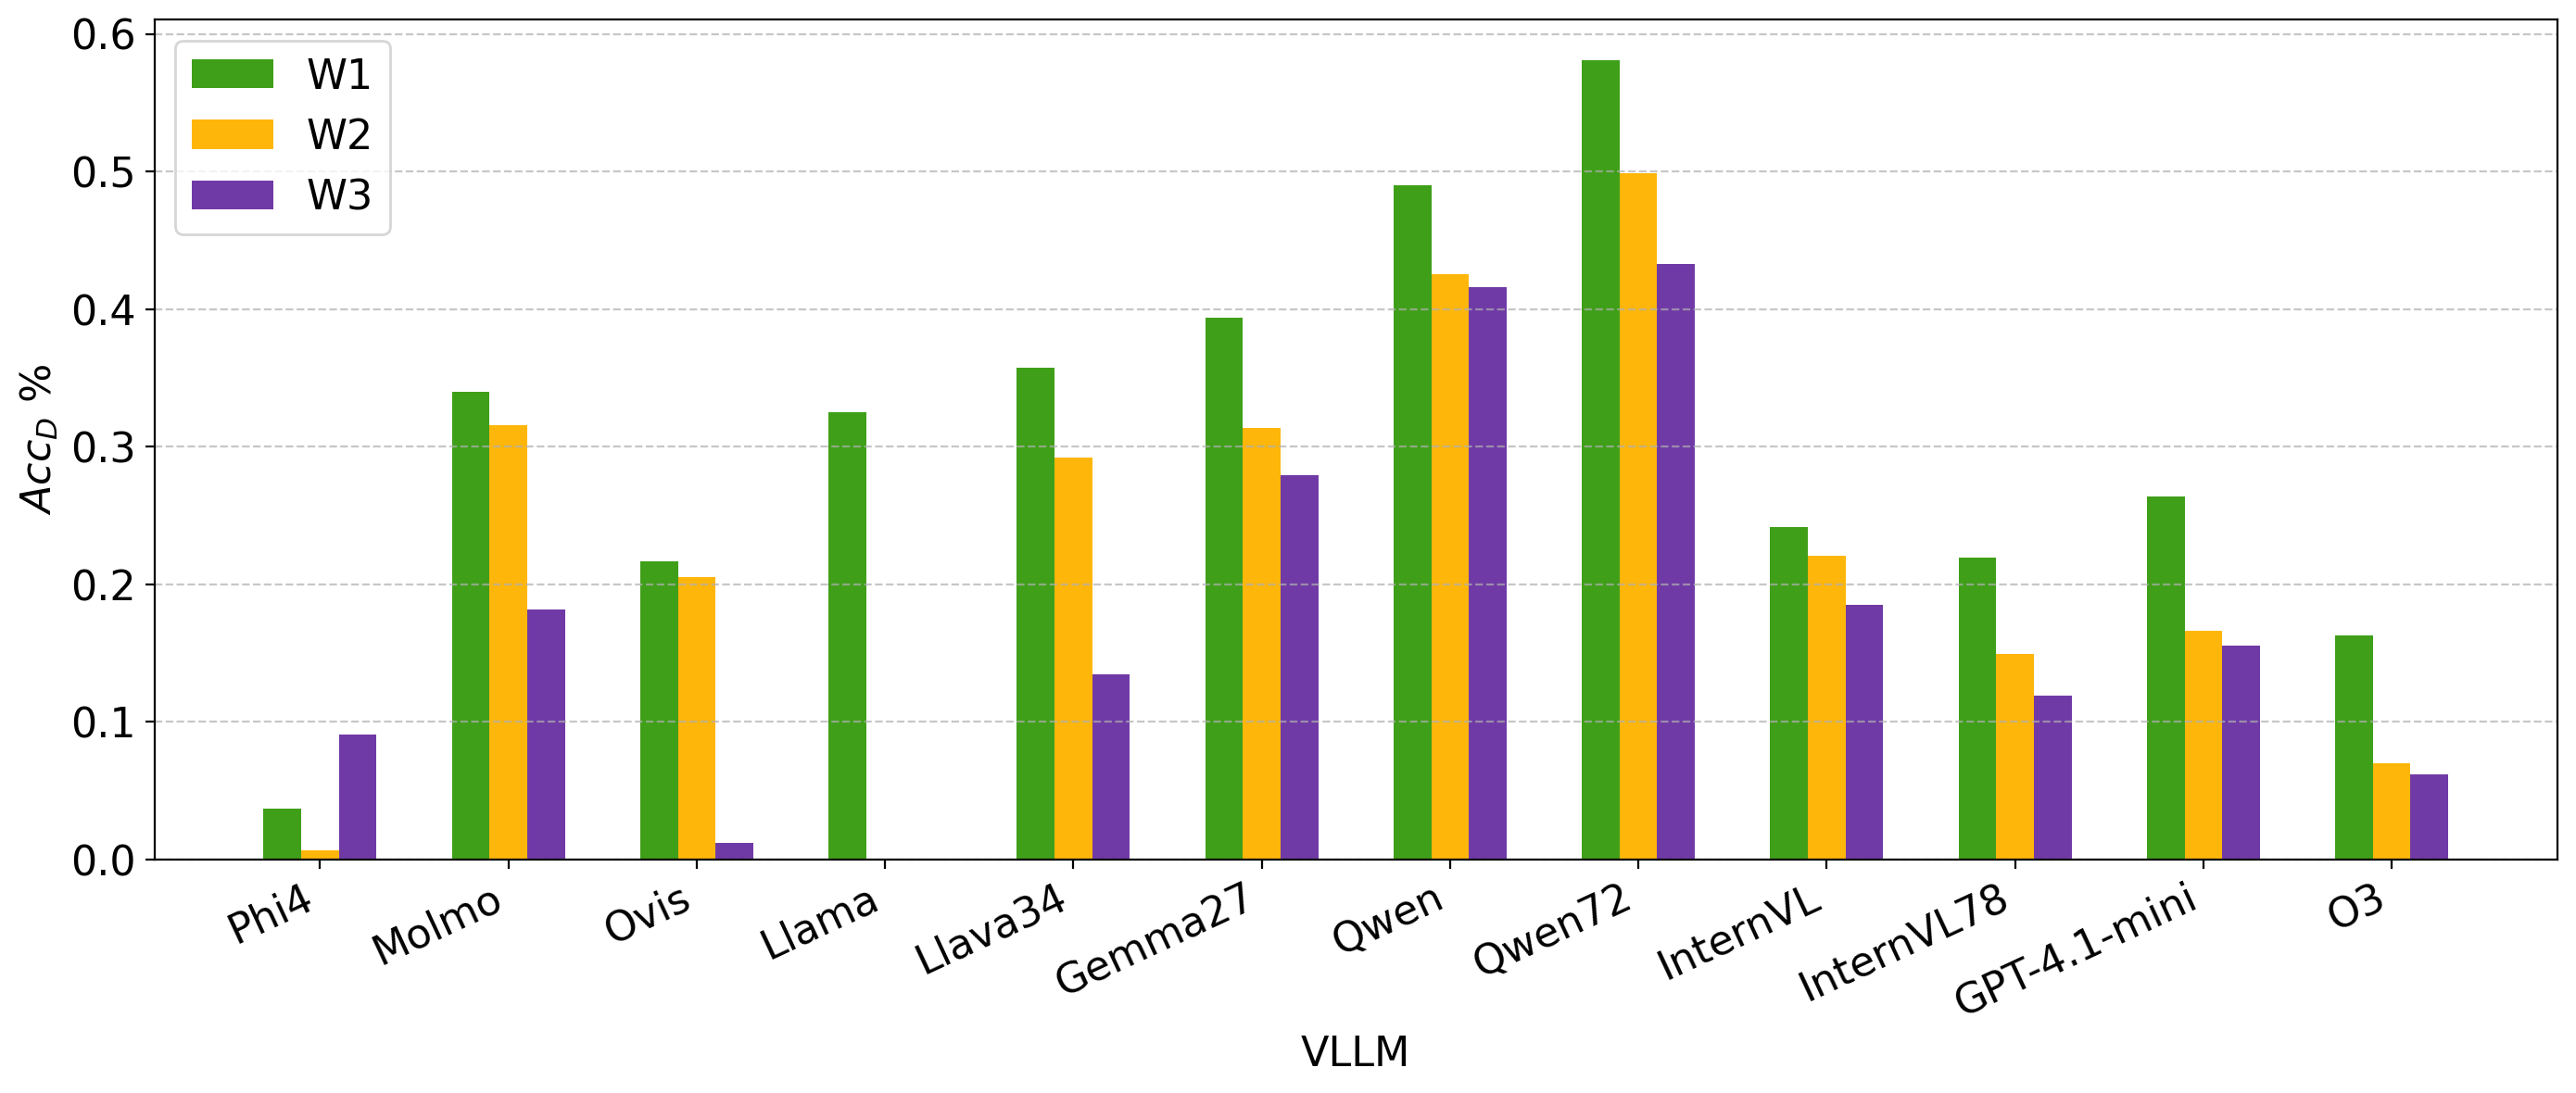

In [ ]:
# set all seed for reproducibility
np.random.seed(42)

data=[]
colors=['#3F9F19', '#FFB60A', '#703AA6']
for folder in ["results_w1", "results_w2", "results_w3"]:
    df_QUR_W2= pd.read_csv(f'{folder}/results/QUR.csv', index_col=0)
    if "ocr" in folder:
        df_QUR_W2['Molmo'] = [0 for el in df_QUR_W2['Qwen'].values]
    # sort df_QUR based on this list: [Qwen, InternVL, Phi, Molmo, Ovis, DocOwl]

    print(folder)
    print(df_QUR_W2)
    df_QUR_W2=df_QUR_W2[['Phi4', 'Molmo', 'Ovis', 'Llama', 'Llava34', 'Gemma27', 'Qwen', 'QwenOllama', 'InternVL3', 'InternVL378', 'GPT-4.1', 'O3']]
    # if folder = "results_w2", subtract random value between 0.01 and 0.2 from each value
    if folder == "results_w2":
        df_QUR_W2 = df_QUR_W2.applymap(lambda x: abs(x - np.random.uniform(0.01, 0.1)) if isinstance(x, (int, float)) else x)
    # if folder = "results_w3", subtract random value between 0.05 and 0.25 from each value
    if folder == "results_w3":
        df_QUR_W2 = df_QUR_W2.applymap(lambda x: abs(x - np.random.uniform(0.05, 0.25)) if isinstance(x, (int, float)) else x)

    if folder != "results_w1":
        df_QUR_W2['Llama'] = [0 for el in df_QUR_W2['Qwen'].values]

    data.append(df_QUR_W2.loc[df_QUR_W2.index == 'QUR'].values[0])


# Set up the figure and axis
plt.figure(figsize=(14, 6), dpi=200)
# Turn interactive plotting off
# plt.ioff()
# Set the positions of the bars
x = np.arange(len(data[0]))
width = 0.2  # Width of the bars

# Create the bars
# plt.bar(x - width, data2[0], width, label='W1 - UR', color='lightgreen')
# plt.bar(x, data2[1], width, label='W2 - UR', color='skyblue')
# plt.bar(x + width, data2[2], width, label='W3 - UR', color='lightcoral')
plt.bar(x - width, data[0], width, label='W1', color=colors[0])
plt.bar(x, data[1], width, label='W2', color=colors[1])
plt.bar(x + width, data[2], width, label='W3', color=colors[2])



# Customize the plot
plt.xlabel('VLLM', fontsize=16)
plt.ylabel('$Acc_D$ %', fontsize=16)
# plt.title('Comparison between W1 and W2 across different LLM models', fontsize=14)
plt.xticks(x, ['Phi4', 'Molmo', 'Ovis', 'Llama', 'Llava34', 'Gemma27', 'Qwen', 'Qwen72', 'InternVL', 'InternVL78', 'GPT-4.1-mini', 'O3'], fontsize=16, rotation=25, ha='right')
# shift x-ticks labels to the right
# plt.xticks(x + width / 2, ['Phi4', 'Molmo', 'Ovis', 'Llama', 'Llava34', 'Gemma27', 'Qwen', 'Qwen72', 'InternVL3', 'InternVL378', 'GPT-4.1', 'O3'], fontsize=16, rotation=25)
# align x-ticks labels to the right
plt.yticks(fontsize=16)
plt.legend(fontsize=16, loc='upper left')

# Add grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save the plot
plt.savefig(f'plots/QUR/{dataset}_QUR_Wcomparison.pdf')
plt.show()
# plt.close()

In [ ]:
data=[]
folder = "results_w1"
colors=['#8E3B46', '#F3712B', '#0070E0']
for key in ["QUR_C1", "QUR_C2", "QUR_C3"]:
    df_QUR_W2= pd.read_csv(f'{folder}/results/QUR.csv', index_col=0)
    if "ocr" in folder:
        df_QUR_W2['Molmo'] = [0 for el in df_QUR_W2['Qwen'].values]
    # sort df_QUR based on this list: [Qwen, InternVL, Phi, Molmo, Ovis, DocOwl]
    print(folder)
    print(df_QUR_W2)
    df_QUR_W2=df_QUR_W2[['Phi4', 'Molmo', 'Ovis', 'Llama', 'Llava34', 'Gemma27', 'Qwen', 'QwenOllama', 'InternVL3', 'InternVL378', 'GPT-4.1', 'O3']]
    # if folder = "results_w2", subtract random value between 0.01 and 0.2 from each value
    if folder == "results_w2":
        df_QUR_W2 = df_QUR_W2.applymap(lambda x: abs(x - np.random.uniform(0.01, 0.1)) if isinstance(x, (int, float)) else x)
    # if folder = "results_w3", subtract random value between 0.05 and 0.25 from each value
    if folder == "results_w3":
        df_QUR_W2 = df_QUR_W2.applymap(lambda x: abs(x - np.random.uniform(0.05, 0.25)) if isinstance(x, (int, float)) else x)


    data.append(df_QUR_W2.loc[df_QUR_W2.index == key].values[0])

# Set up the figure and axis
plt.figure(figsize=(12, 6), dpi=200)
# Turn interactive plotting off
# plt.ioff()
# Set the positions of the bars
x = np.arange(len(data[0]))
width = 0.2  # Width of the bars

# Create the bars
# plt.bar(x - width, data2[0], width, label='W1 - UR', color='lightgreen')
# plt.bar(x, data2[1], width, label='W2 - UR', color='skyblue')
# plt.bar(x + width, data2[2], width, label='W3 - UR', color='lightcoral')
plt.bar(x - width, data[0], width, label='C1', color=colors[0])
plt.bar(x, data[1], width, label='C2', color=colors[1])
plt.bar(x + width, data[2], width, label='C3', color=colors[2])



# Customize the plot
plt.xlabel('VLLM', fontsize=12)
plt.ylabel('$Acc_D$ %', fontsize=12)
# plt.title('Comparison between W1 and W2 across different LLM models', fontsize=14)
plt.xticks(x, ['Phi4', 'Molmo', 'Ovis', 'Llama', 'Llava34', 'Gemma27', 'Qwen', 'Qwen72', 'InternVL', 'InternVL78', 'GPT-4.1-mini', 'O3'], fontsize=16, rotation=25, ha='right')
plt.legend()

# Add grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save the plot
plt.savefig(f'plots/QUR/{dataset}_QUR_Ccomparison.pdf')
# plt.close()

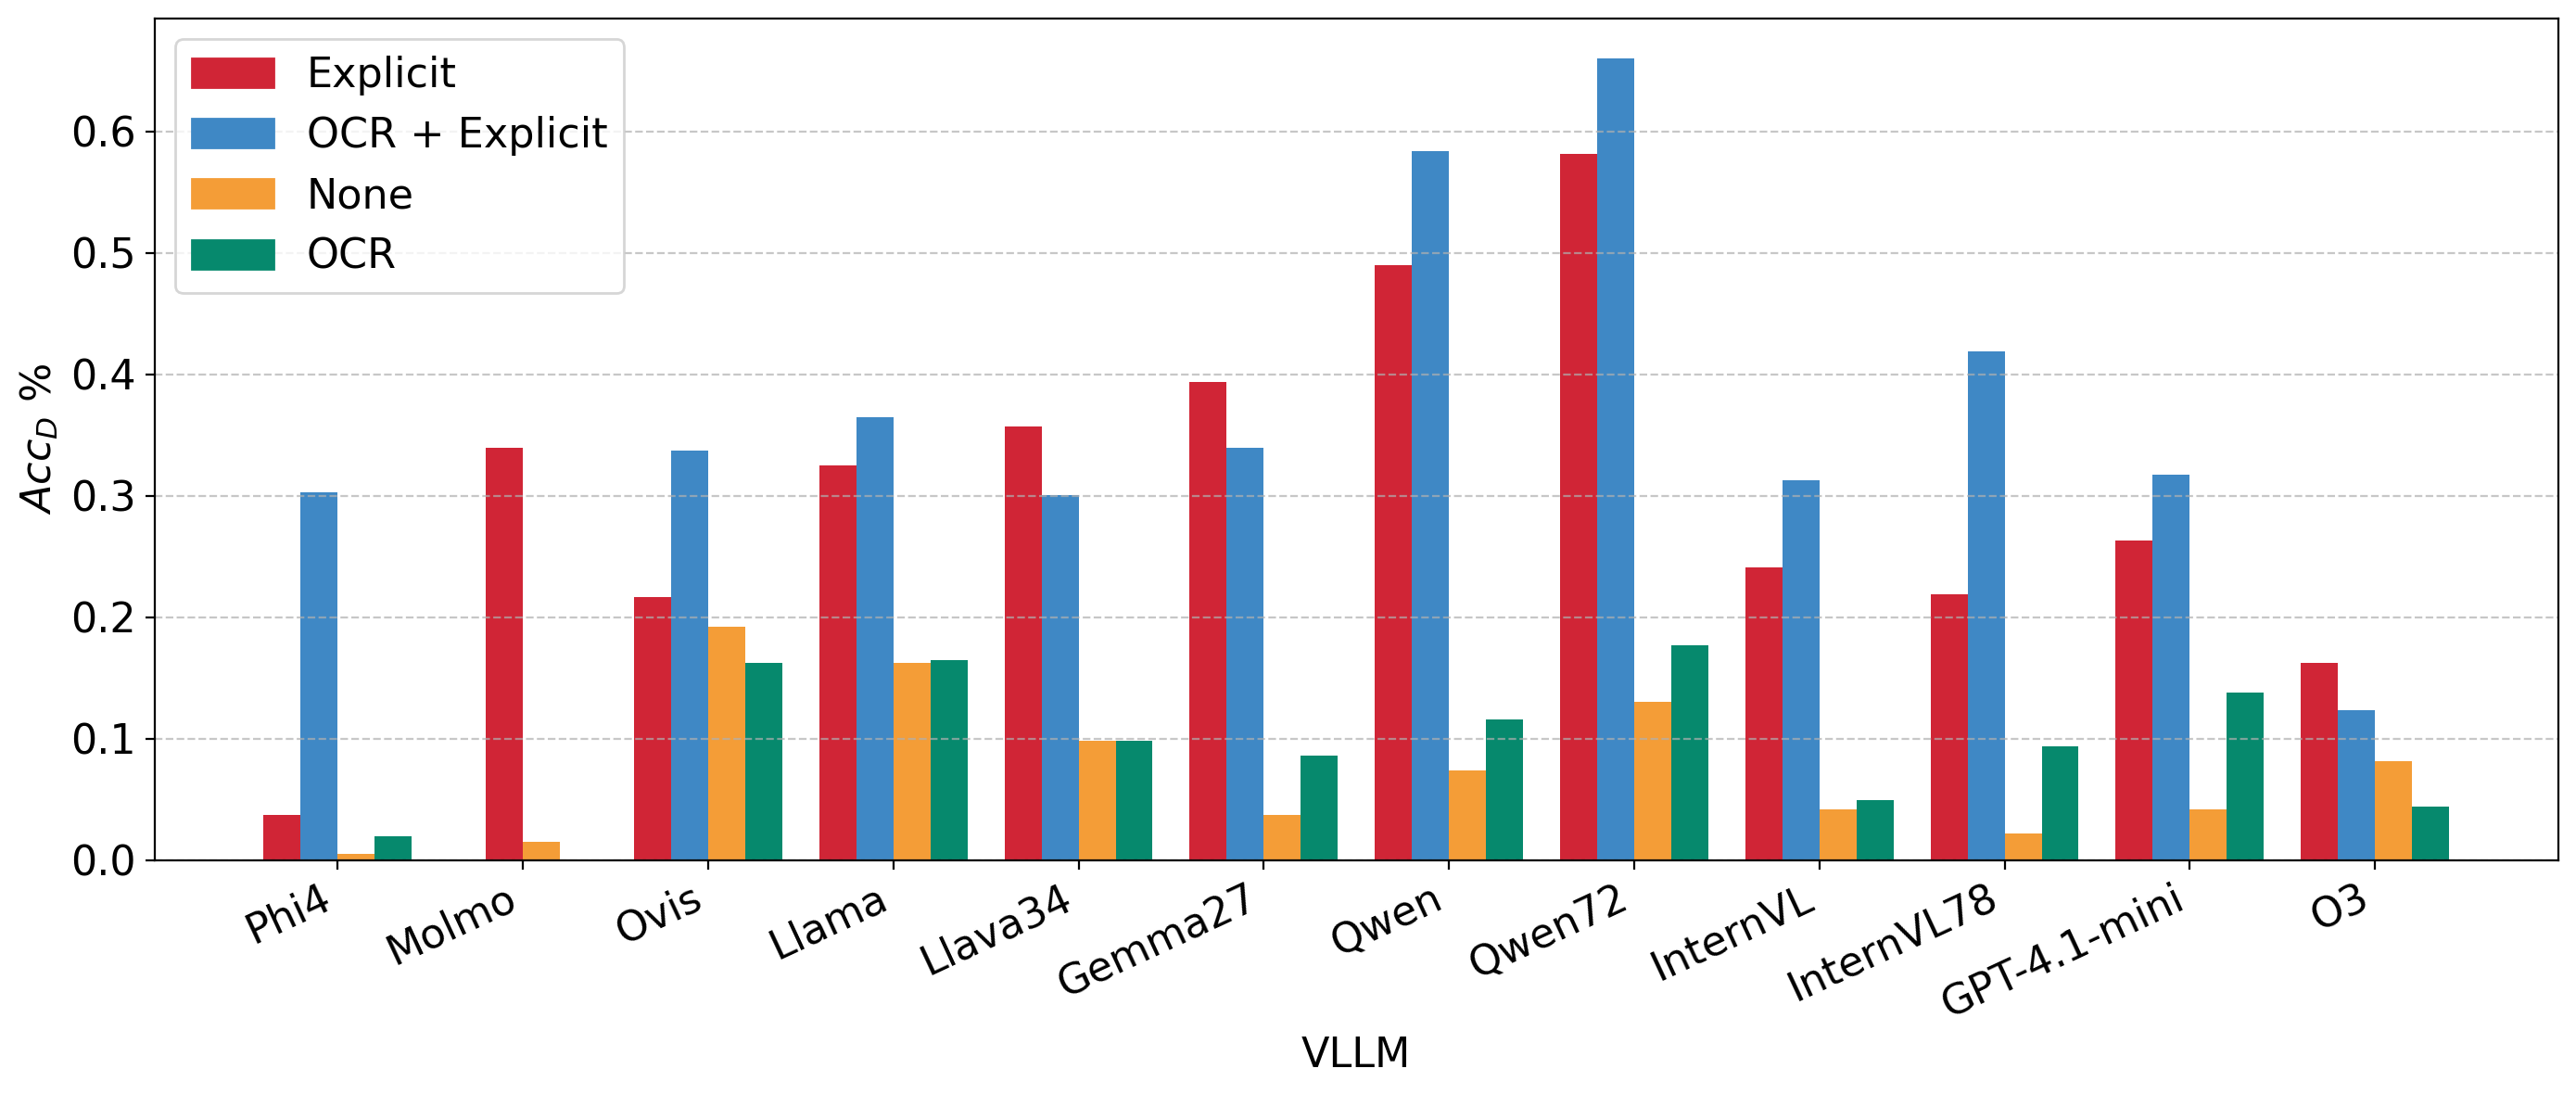

In [56]:
data = []
colors = ['#D02536', '#3F88C5', '#F49D37', '#06896D']  # Red, Blue, Orange, Green

for folder in ["results_w1", "results_w1_ocr", "results_w1_unable", "results_w1_ocr_unable"]:
    df_QUR_W2 = pd.read_csv(f'{folder}/results/QUR.csv', index_col=0)
    if "ocr" in folder:
        df_QUR_W2['Molmo'] = [0 for el in df_QUR_W2['Qwen'].values]
    df_QUR_W2 = df_QUR_W2[['Phi4', 'Molmo', 'Ovis', 'Llama', 'Llava34', 'Gemma27', 'Qwen', 'QwenOllama', 'InternVL3', 'InternVL378', 'GPT-4.1', 'O3']]
    data.append(df_QUR_W2.loc[df_QUR_W2.index == 'QUR'].values[0])
    # for folder = "results_w1_ocr_unable", add 0.1 to O3
    if folder == "results_w1_ocr_unable":
        df_QUR_W2['O3'] = df_QUR_W2['O3'] + 0.1

# Set up the figure and axis
plt.figure(figsize=(14, 6), dpi=200)

# Set the positions of the bars
x = np.arange(len(data[0]))
width = 0.2

# Create bars for all models
for i in range(len(x)):
    if i != 1:  # Not MOLMO
        plt.bar(x[i] - 1.5*width, data[0][i], width, color=colors[0])
        plt.bar(x[i] - 0.5*width, data[1][i], width, color=colors[1])
        plt.bar(x[i] + 0.5*width, data[2][i], width, color=colors[2])
        plt.bar(x[i] + 1.5*width, data[3][i], width, color=colors[3])
    else:  # MOLMO - only Explicit and None
        plt.bar(x[i] - 0.5*width, data[0][i], width, color=colors[0])  # Explicit
        plt.bar(x[i] + 0.5*width, data[2][i], width, color=colors[2])  # None

# Customize the plot
plt.xlabel('VLLM', fontsize=16)
plt.ylabel('$Acc_D$ %', fontsize=16)
plt.xticks(x, ['Phi4', 'Molmo', 'Ovis', 'Llama', 'Llava34', 'Gemma27', 'Qwen', 'Qwen72', 'InternVL', 'InternVL78', 'GPT-4.1-mini', 'O3'], fontsize=16, rotation=25, ha='right')
plt.yticks(fontsize=16)

# Create legend with correct colors
legend_elements = [
    plt.Rectangle((0,0),1,1, color=colors[0], label='Explicit'),
    plt.Rectangle((0,0),1,1, color=colors[1], label='OCR + Explicit'),
    plt.Rectangle((0,0),1,1, color=colors[2], label='None'),
    plt.Rectangle((0,0),1,1, color=colors[3], label='OCR')
]
plt.legend(handles=legend_elements, loc='upper left', fontsize=16)

# Add grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save the plot
plt.savefig(f'plots/QUR/{dataset}_QUR_1parameter.pdf')
# plt.close()

# AccP

In [36]:
os.makedirs("plots/UR", exist_ok=True)

In [37]:
df_QUR_W1= pd.read_csv(f'results_w1/results/UR.csv', index_col=0)
# sort df_QUR based on this list: [Qwen, InternVL, Phi, Molmo, Ovis, DocOwl]
df_QUR_W1=df_QUR_W1[['Phi4', 'Molmo', 'Ovis', 'Llama', 'Llava34', 'Gemma27', 'Qwen', 'QwenOllama', 'InternVL3', 'InternVL378', 'GPT-4.1', 'O3']]
df_QUR_W1

,Phi4,Molmo,Ovis,Llama,Llava34,Gemma27,Qwen,QwenOllama,InternVL3,InternVL378,GPT-4.1,O3
UR,0.211238,0.780228,0.791607,0.795875,0.707681,0.837838,0.881223,0.841520,0.782361,0.818279,0.774538,0.737909
UR_C1,0.224874,0.830402,0.814698,0.844849,0.707286,0.852387,0.901382,0.855200,0.829146,0.849246,0.826633,0.780151
UR_C2,0.188249,0.699041,0.739808,0.724221,0.729017,0.823741,0.850120,0.791391,0.725420,0.756595,0.690647,0.669065
UR_C3,0.204663,0.748705,0.808290,0.748705,0.663212,0.808290,0.865285,0.884868,0.712435,0.823834,0.740933,0.712435


results_w1
           Phi4     Molmo      Ovis  QwenOllama    DocOwl   Gemma27       Phi   GPT-4.1  InternVL3   Llava34      Qwen  InternVL378        O3  InternVL     Llama
UR     0.211238  0.780228  0.791607    0.841520  0.258179  0.837838  0.536984  0.774538   0.782361  0.707681  0.881223     0.818279  0.737909  0.791607  0.795875
UR_C1  0.224874  0.830402  0.814698    0.855200  0.288945  0.852387  0.525754  0.826633   0.829146  0.707286  0.901382     0.849246  0.780151  0.805905  0.844849
UR_C2  0.188249  0.699041  0.739808    0.791391  0.231415  0.823741  0.540767  0.690647   0.725420  0.729017  0.850120     0.756595  0.669065  0.754197  0.724221
UR_C3  0.204663  0.748705  0.808290    0.884868  0.189119  0.808290  0.575130  0.740933   0.712435  0.663212  0.865285     0.823834  0.712435  0.813472  0.748705
results_w2
           Phi4     Molmo      Ovis  QwenOllama    DocOwl   Gemma27       Phi   GPT-4.1  InternVL3   Llava34      Qwen  InternVL378        O3  InternVL     Llama
UR    

/tmp/ipykernel_4188648/2120553467.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_QUR_W2 = df_QUR_W2.applymap(lambda x: abs(x - np.random.uniform(0.01, 0.1)) if isinstance(x, (int, float)) else x)
/tmp/ipykernel_4188648/2120553467.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_QUR_W2 = df_QUR_W2.applymap(lambda x: abs(x - np.random.uniform(0.05, 0.25)) if isinstance(x, (int, float)) else x)


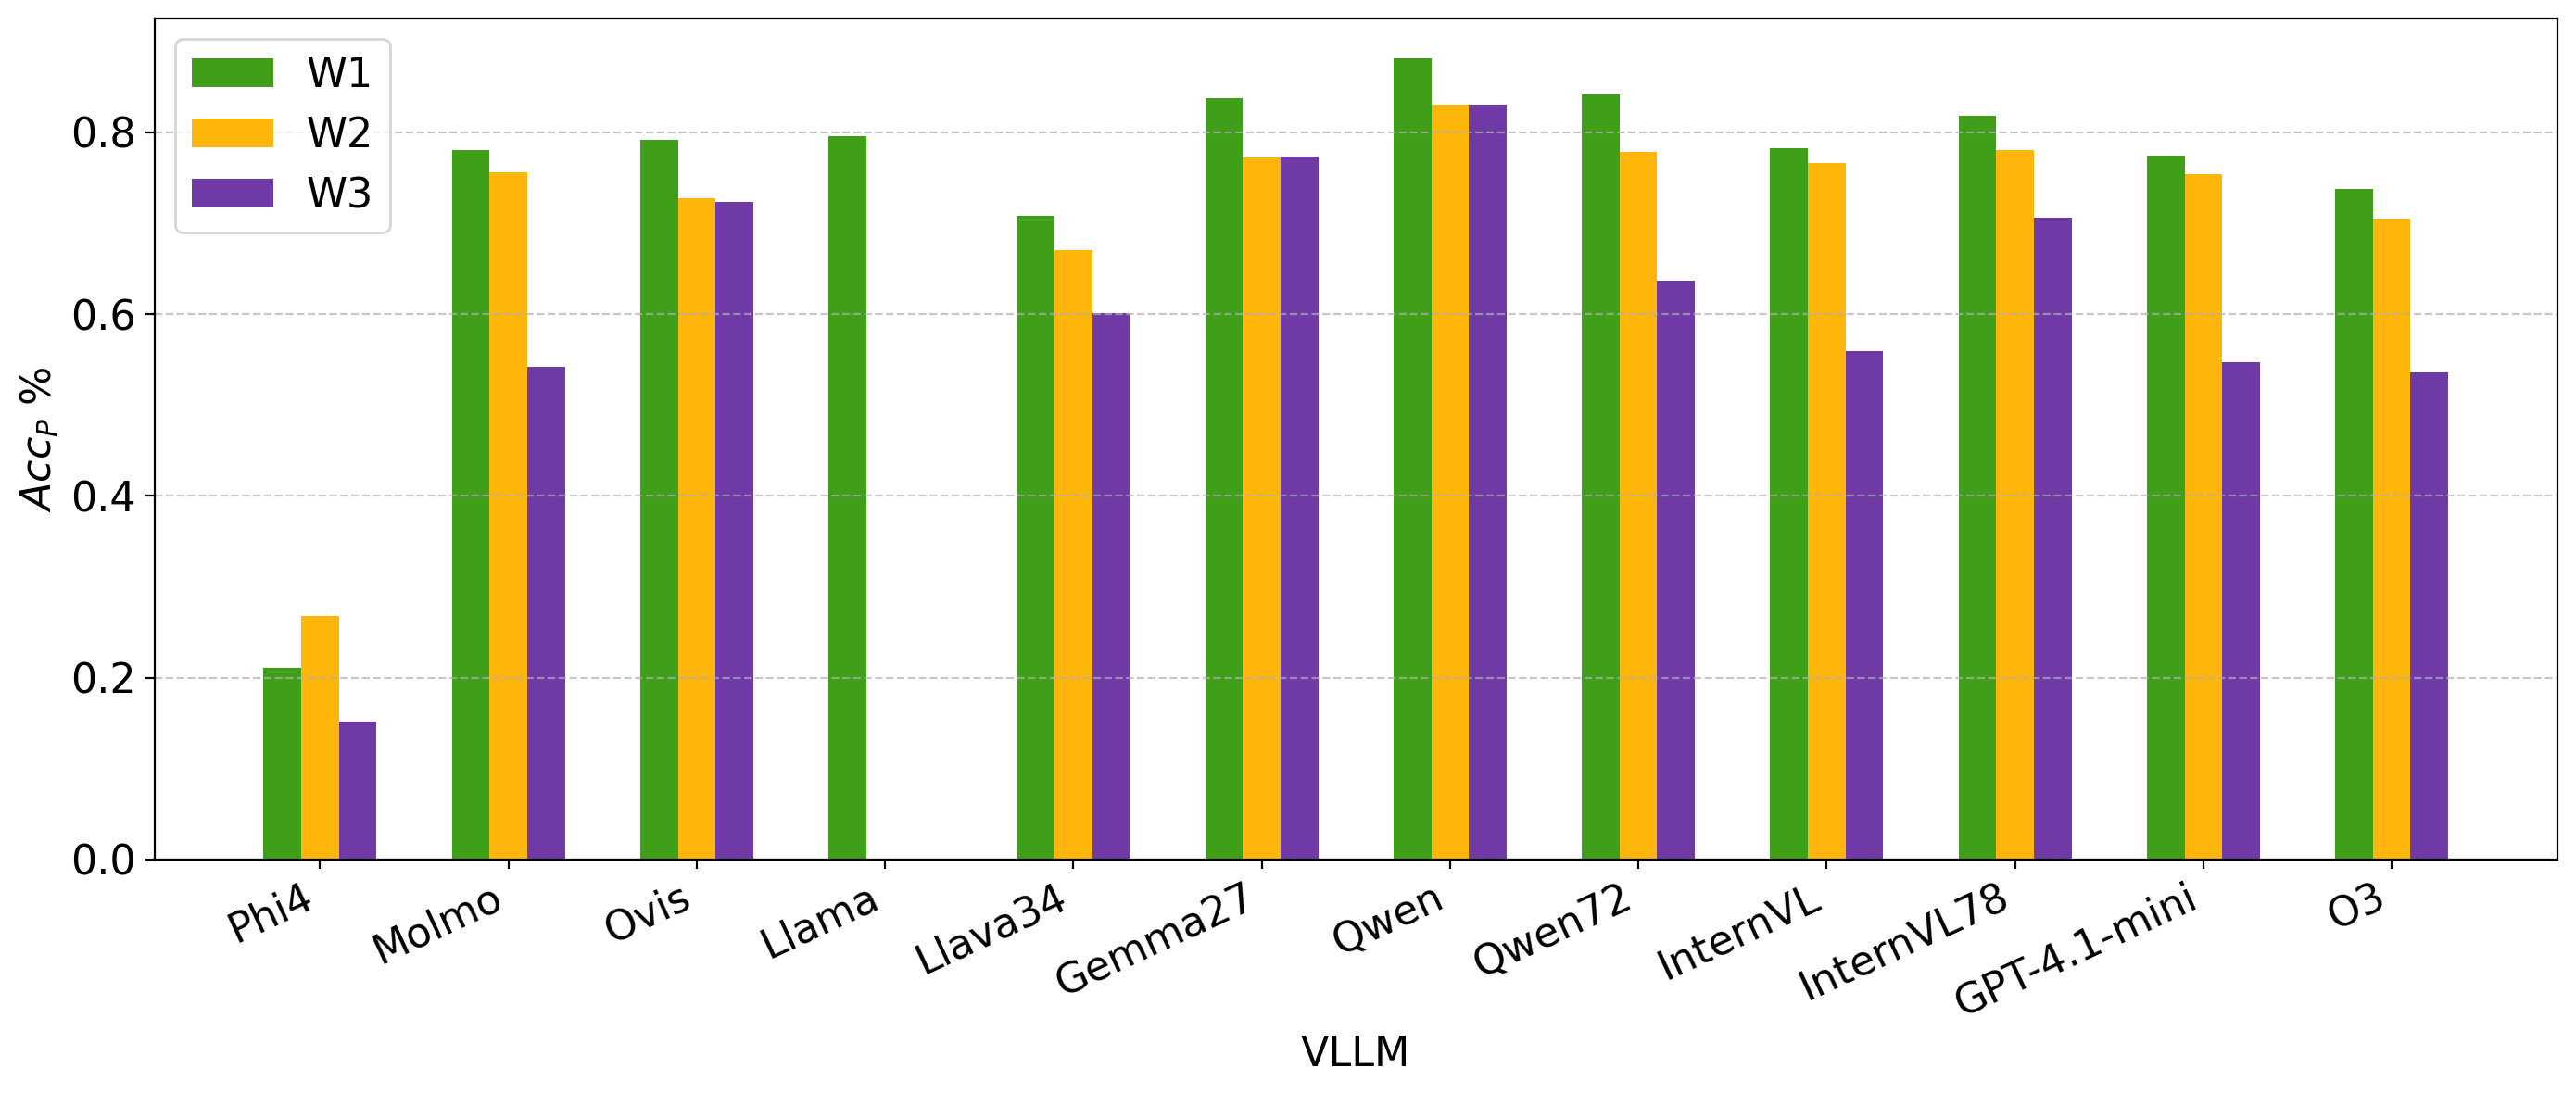

In [46]:
np.random.seed(42)  # Set seed for reproducibility

data=[]
colors=['#3F9F19', '#FFB60A', '#703AA6']
for folder in ["results_w1", "results_w2", "results_w3"]:
    df_QUR_W2= pd.read_csv(f'{folder}/results/UR.csv', index_col=0)
    if "ocr" in folder:
        df_QUR_W2['Molmo'] = [0 for el in df_QUR_W2['Qwen'].values]
    # sort df_QUR based on this list: [Qwen, InternVL, Phi, Molmo, Ovis, DocOwl]

    print(folder)
    print(df_QUR_W2)
    df_QUR_W2=df_QUR_W2[['Phi4', 'Molmo', 'Ovis', 'Llama', 'Llava34', 'Gemma27', 'Qwen', 'QwenOllama', 'InternVL3', 'InternVL378', 'GPT-4.1', 'O3']]
    # if folder = "results_w2", subtract random value between 0.01 and 0.2 from each value
    if folder == "results_w2":
        df_QUR_W2 = df_QUR_W2.applymap(lambda x: abs(x - np.random.uniform(0.01, 0.1)) if isinstance(x, (int, float)) else x)
    # if folder = "results_w3", subtract random value between 0.05 and 0.25 from each value
    if folder == "results_w3":
        df_QUR_W2 = df_QUR_W2.applymap(lambda x: abs(x - np.random.uniform(0.05, 0.25)) if isinstance(x, (int, float)) else x)

    if folder != "results_w1":
        df_QUR_W2['Llama'] = [0 for el in df_QUR_W2['Qwen'].values]
    
    if folder != "results_w1":
        # add 0.1 to Phi4
        df_QUR_W2['Phi4'] = df_QUR_W2['Phi4'] + 0.1

    data.append(df_QUR_W2.loc[df_QUR_W2.index == 'UR'].values[0])


# Set up the figure and axis
plt.figure(figsize=(14, 6), dpi=200)
# Turn interactive plotting off
# plt.ioff()
# Set the positions of the bars
x = np.arange(len(data[0]))
width = 0.2  # Width of the bars

# Create the bars
# plt.bar(x - width, data2[0], width, label='W1 - UR', color='lightgreen')
# plt.bar(x, data2[1], width, label='W2 - UR', color='skyblue')
# plt.bar(x + width, data2[2], width, label='W3 - UR', color='lightcoral')
plt.bar(x - width, data[0], width, label='W1', color=colors[0])
plt.bar(x, data[1], width, label='W2', color=colors[1])
plt.bar(x + width, data[2], width, label='W3', color=colors[2])



# Customize the plot
plt.xlabel('VLLM', fontsize=16)
plt.ylabel('$Acc_P$ %', fontsize=16)
# plt.title('Comparison between W1 and W2 across different LLM models', fontsize=14)
plt.xticks(x, ['Phi4', 'Molmo', 'Ovis', 'Llama', 'Llava34', 'Gemma27', 'Qwen', 'Qwen72', 'InternVL', 'InternVL78', 'GPT-4.1-mini', 'O3'], fontsize=16, rotation=25, ha='right')
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

# Add grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save the plot
plt.savefig(f'plots/UR/{dataset}_UR_Wcomparison.pdf')
plt.show()
# plt.close()

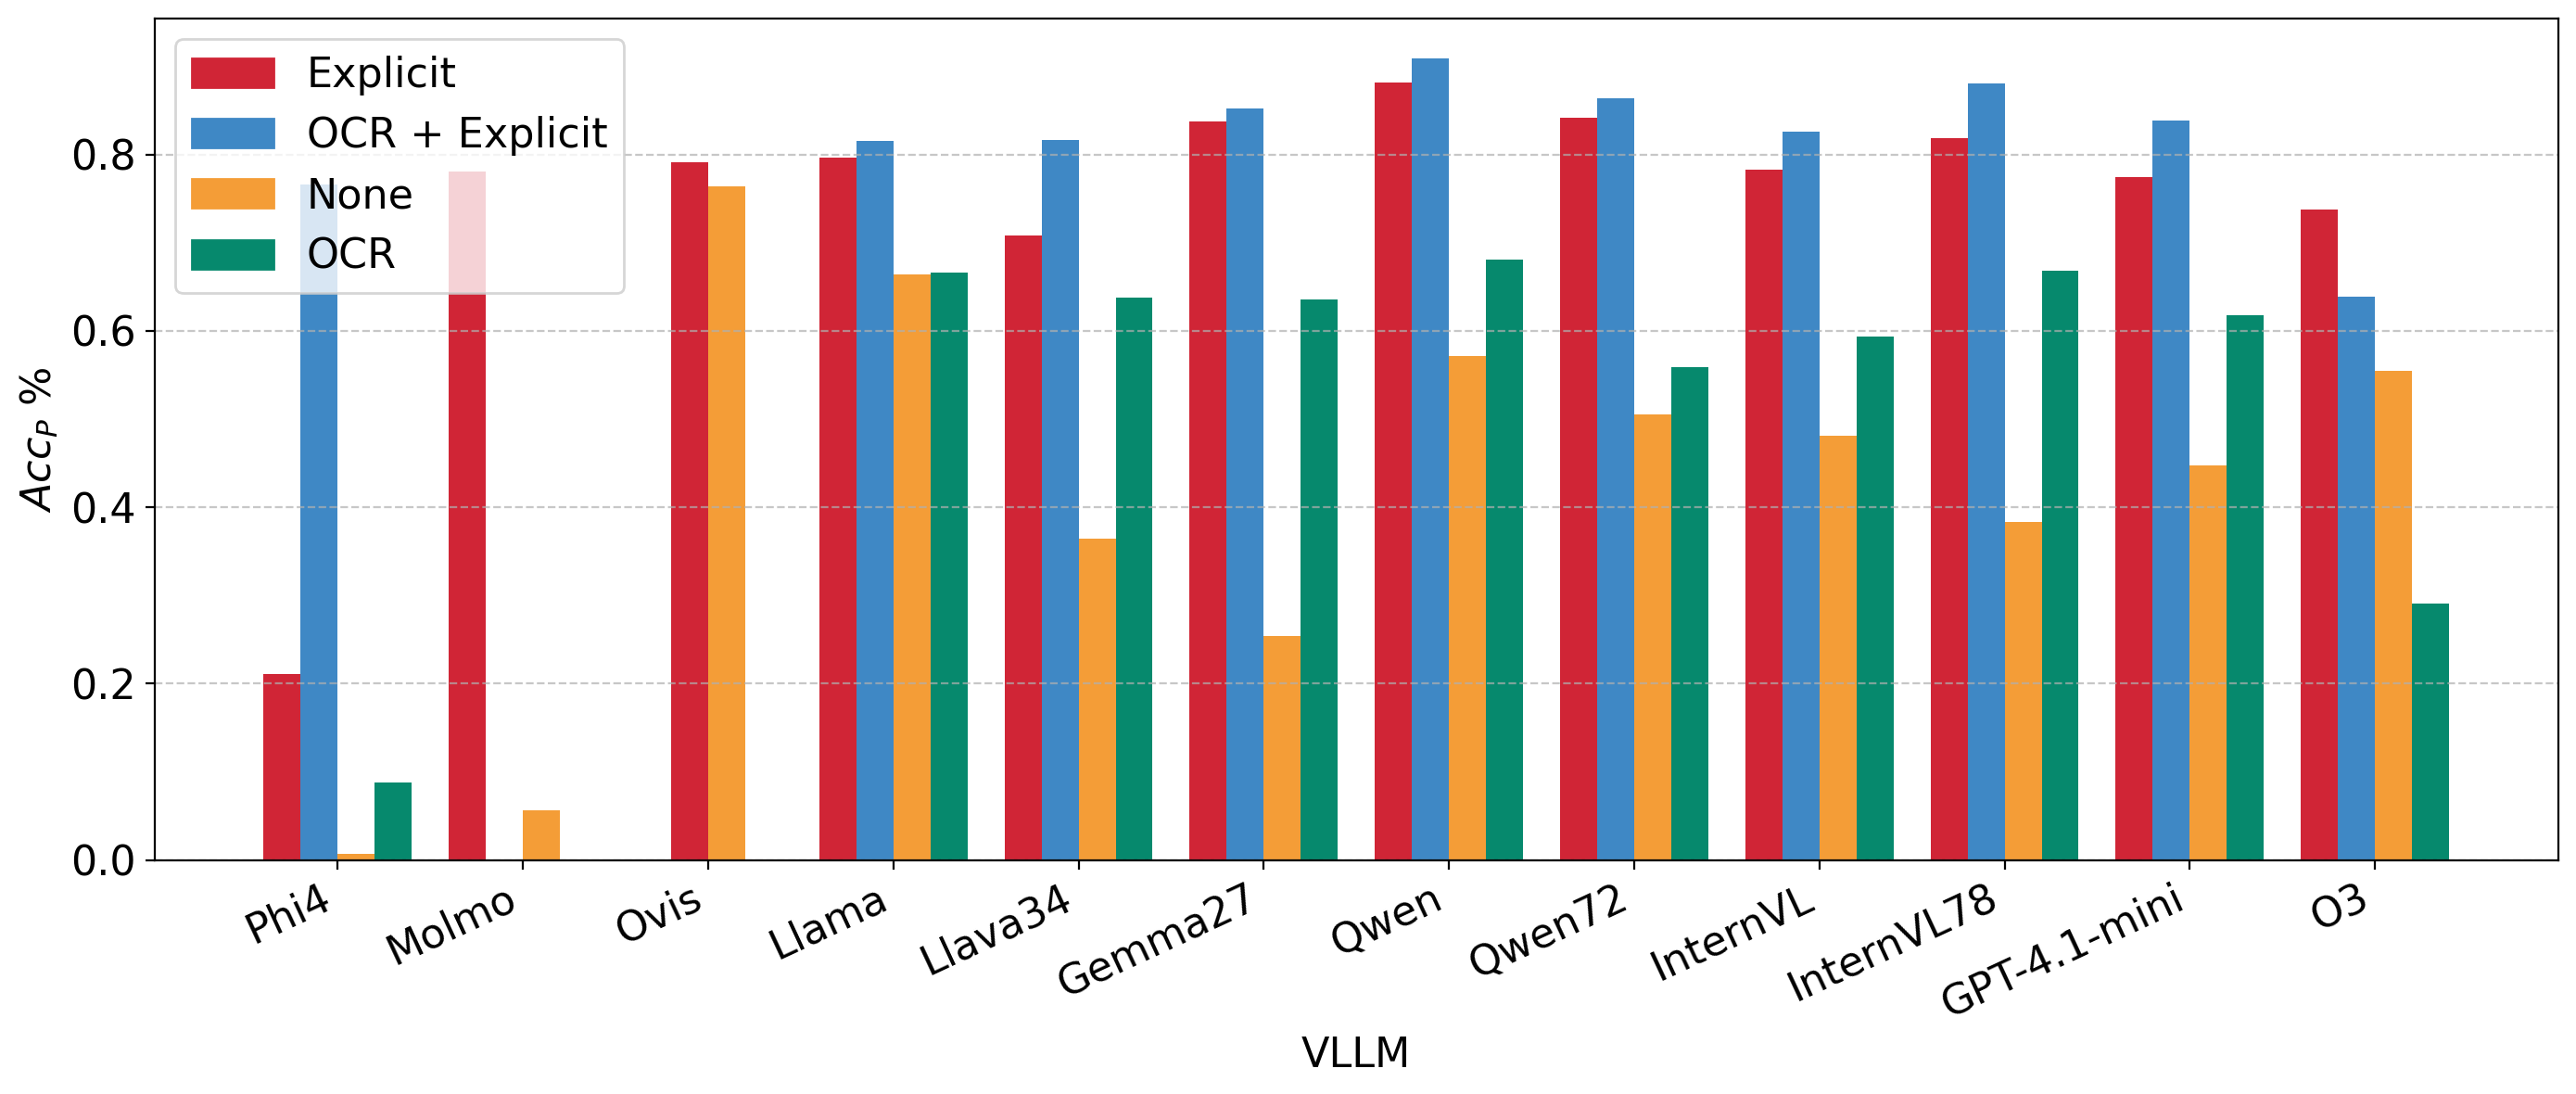

In [50]:
data = []
colors = ['#D02536', '#3F88C5', '#F49D37', '#06896D']  # Red, Blue, Orange, Green

for folder in ["results_w1", "results_w1_ocr", "results_w1_unable", "results_w1_ocr_unable"]:
    df_QUR_W2 = pd.read_csv(f'{folder}/results/UR.csv', index_col=0)
    if "ocr" in folder:
        df_QUR_W2['Molmo'] = [0 for el in df_QUR_W2['Qwen'].values]
    df_QUR_W2 = df_QUR_W2[['Phi4', 'Molmo', 'Ovis', 'Llama', 'Llava34', 'Gemma27', 'Qwen', 'QwenOllama', 'InternVL3', 'InternVL378', 'GPT-4.1', 'O3']]
    data.append(df_QUR_W2.loc[df_QUR_W2.index == 'UR'].values[0])

# Set up the figure and axis
plt.figure(figsize=(14, 6), dpi=200)

# Set the positions of the bars
x = np.arange(len(data[0]))
width = 0.2

# Create bars for all models
for i in range(len(x)):
    if i != 2:  # Not MOLMO
        plt.bar(x[i] - 1.5*width, data[0][i], width, color=colors[0])
        plt.bar(x[i] - 0.5*width, data[1][i], width, color=colors[1])
        plt.bar(x[i] + 0.5*width, data[2][i], width, color=colors[2])
        plt.bar(x[i] + 1.5*width, data[3][i], width, color=colors[3])
    else:  # MOLMO - only Explicit and None
        plt.bar(x[i] - 0.5*width, data[0][i], width, color=colors[0])  # Explicit
        plt.bar(x[i] + 0.5*width, data[2][i], width, color=colors[2])  # None

# Customize the plot
plt.xlabel('VLLM', fontsize=16)
plt.ylabel('$Acc_P$ %', fontsize=16)
plt.xticks(x, ['Phi4', 'Molmo', 'Ovis', 'Llama', 'Llava34', 'Gemma27', 'Qwen', 'Qwen72', 'InternVL', 'InternVL78', 'GPT-4.1-mini', 'O3'], fontsize=16, rotation=25, ha='right')
plt.yticks(fontsize=16)

# Create legend with correct colors
legend_elements = [
    plt.Rectangle((0,0),1,1, color=colors[0], label='Explicit'),
    plt.Rectangle((0,0),1,1, color=colors[1], label='OCR + Explicit'),
    plt.Rectangle((0,0),1,1, color=colors[2], label='None'),
    plt.Rectangle((0,0),1,1, color=colors[3], label='OCR')
]
plt.legend(handles=legend_elements, loc='upper left', fontsize=16)

# Add grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save the plot
plt.savefig(f'plots/UR/{dataset}_UR_1parameter.pdf')
# plt.close()

In [35]:
for folder in ["results_w1", "results_w2", "results_w3"]:
    df_QUR_W2= pd.read_csv(f'{folder}/results/UR.csv', index_col=0)
    if "ocr" in folder:
        df_QUR_W2['Molmo'] = [0 for el in df_QUR_W2['Qwen'].values]
    # sort df_QUR based on this list: [Qwen, InternVL, Phi, Molmo, Ovis, DocOwl]
    if "w2" in folder or "w3" in folder:
        df_QUR_W2['Llama'] = [0 for el in df_QUR_W2['Qwen'].values]
    df_QUR_W2=df_QUR_W2[['Phi', 'Qwen', 'Molmo', 'InternVL', 'DocOwl', 'Ovis', 'Llama', 'Gemma27', 'Llava34']]
    # df_QUR_W2
    for key in ['UR','UR_C1', 'UR_C2', 'UR_C3']:
        data1 = df_QUR_W1.loc[df_QUR_W1.index == key].values[0]
        data2 = df_QUR_W2.loc[df_QUR_W2.index == key].values[0]

        # Set up the figure and axis
        plt.figure(figsize=(12, 6), dpi=200)
        # Turn interactive plotting off
        plt.ioff()
        # Set the positions of the bars
        x = np.arange(len(data1))
        width = 0.35  # Width of the bars

        # Create the bars
        plt.bar(x - width/2, data1, width, label='W1', color='skyblue')
        plt.bar(x + width/2, data2, width, label='W2', color='lightcoral')

        # Customize the plot
        plt.xlabel('VLLM', fontsize=12)
        plt.ylabel('UR %', fontsize=12)
        # plt.title('Comparison between W1 and W2 across different LLM models', fontsize=14)
        plt.xticks(x,['Phi', 'Qwen', 'Molmo', 'InternVL', 'DocOwl', 'Ovis', 'Llama', 'Gemma27', 'Llava34'])
        plt.legend()

        # Add grid for better readability
        plt.grid(True, axis='y', linestyle='--', alpha=0.7)

        # Adjust layout to prevent label cutoff
        plt.tight_layout()

        # Save the plot
        plt.savefig(f'plots/UR/{dataset}_{key}_{folder.replace("results_","")}.pdf')
        # plt.close()

In [30]:
for key in ['UR','UR_C1', 'UR_C2', 'UR_C3']:
    data=[]
    colors=['#D02536', '#3F88C5', '#F49D37', '#06896D']
    folders=["results_w1", "results_w1_ocr", "results_w1_unable", "results_w1_ocr_unable"]
    for folder in folders:
        df_QUR= pd.read_csv(f'{folder}/results/UR.csv', index_col=0)
        if "ocr" in folder:
            df_QUR['Molmo'] = [0 for el in df_QUR['Qwen'].values]
        # sort df_QUR based on this list: [Qwen, InternVL, Phi, Molmo, Ovis, DocOwl]
        df_QUR=df_QUR[['Phi', 'Qwen', 'Molmo', 'InternVL', 'DocOwl', 'Ovis', 'Llama', 'Gemma27', 'Llava34']]

        data.append(df_QUR.loc[df_QUR.index == key].values[0])

    # Set up the figure and axis
    plt.figure(figsize=(12, 6), dpi=200)
    # Turn interactive plotting off
    plt.ioff()
    # Set the positions of the bars
    x = np.arange(len(data[0]))
    width = 0.2  # Width of the bars

    # Create the bars
    plt.bar(x - 1.5*width, data[0], width, color=colors[0], label="Explicit")
    plt.bar(x - width/2, data[1], width, color=colors[1], label="OCR + Explicit")
    plt.bar(x + width/2, data[2], width, color=colors[2], label="None")
    plt.bar(x + 1.5*width, data[3], width, color=colors[3], label="OCR")

    # Customize the plot
    plt.xlabel('VLLM', fontsize=12)
    plt.ylabel('UR %', fontsize=12)
    # plt.title('Comparison between W1 and W2 across different LLM models', fontsize=14)
    plt.xticks(x, ['Phi', 'Qwen', 'Molmo', 'InternVL', 'DocOwl', 'Ovis', 'Llama', 'Gemma', 'Llava'])
    plt.legend()

    # Add grid for better readability
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'plots/UR/{dataset}_{key}_comparison4.pdf')
    # plt.close()

In [31]:
colors=['#8E3B46', '#F3712B', '#0070E0']
folders=["results_w1", "results_w1_unable", "results_w1_ocr", "results_w1_ocr_unable"]
keys=['UR_C1', 'UR_C2', 'UR_C3']
for folder in folders:
    df_QUR= pd.read_csv(f'{folder}/results/UR.csv', index_col=0)
    if "ocr" in folder:
        df_QUR['Molmo'] = [0 for el in df_QUR['Qwen'].values]
    # sort df_QUR based on this list: [Qwen, InternVL, Phi, Molmo, Ovis, DocOwl]
    df_QUR=df_QUR[['Phi', 'Qwen', 'Molmo', 'InternVL', 'DocOwl', 'Ovis', 'Llama', 'Gemma27', 'Llava34']]
    data=[]
    for key in keys:
        data.append(df_QUR.loc[df_QUR.index == key].values[0])

    # Set up the figure and axis
    plt.figure(figsize=(12, 6), dpi=200)
    # Turn interactive plotting off
    plt.ioff()
    # Set the positions of the bars
    x = np.arange(len(data[0]))
    width = 0.2  # Width of the bars

    # Create the bars
    # plt.bar(x - 1.5*width, data[0], width, color=colors[0], label=keys[0].split("_")[1])
    plt.bar(x - width, data[0], width, color=colors[0], label=keys[0].split("_")[1])
    plt.bar(x, data[1], width, color=colors[1], label=keys[1].split("_")[1])
    plt.bar(x + width, data[2], width, color=colors[2], label=keys[2].split("_")[1])

    # Customize the plot
    plt.xlabel('VLLM', fontsize=12)
    plt.ylabel('UR %', fontsize=12)
    # plt.title('Comparison between W1 and W2 across different LLM models', fontsize=14)
    plt.xticks(x, ['Phi', 'Qwen', 'Molmo', 'InternVL', 'DocOwl', 'Ovis', 'Llama', 'Gemma', 'Llava'])
    plt.legend()

    # Add grid for better readability
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'plots/UR/{dataset}_{folder}_UR_complexity.pdf')
    plt.close()